## 영단어 키워드 분석

### 패키지 설치

In [44]:
# wordcloud 패키지설치
!pip install wordcloud

In [4]:
# 자연어처리 패키치 설치
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 6.8 MB/s eta 0:00:00
     ------------------------------------- 262.7/262.7 kB 15.8 MB/s eta 0:00:00
     ------------------------------------- 307.0/307.0 kB 18.5 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB ? eta 0:00:00
     ---------------------------------------- 78.4/78.4 kB 4.3 MB/s eta 0:00:00


In [17]:
#### 패키지 import

In [18]:
import pandas as pd
import glob
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud
import re

#### NLTK 리소스를 최초 한번 다운로드

- 다른 팝업 창필요한 것들 다운로드

In [19]:
import nltk

In [20]:
# nltk.download()

In [21]:
# 파일병합
all_files = glob.glob('./data/myCabinetExcelData*.xls')
all_files

['./data\\myCabinetExcelData (1).xls',
 './data\\myCabinetExcelData (2).xls',
 './data\\myCabinetExcelData (3).xls',
 './data\\myCabinetExcelData (4).xls',
 './data\\myCabinetExcelData.xls']

In [22]:
# !pip install xlrd

In [23]:
all_data = []
for file in all_files:
    df = pd.read_excel(file)
    all_data.append(df)


In [24]:
all_data_concat = pd.concat(all_data, axis=0, ignore_index=True)
all_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Call for Special Issue Papers: Big Data Analyt...,"El-Latif, Ahmed A. Abd; Tawalbeh, Lo'ai; Maleh...",Mary Ann Leibert,2021
1,NaN,2,Call for Papers: Special Issue on Big Data in ...,unknown,Mary Ann Leibert,2016
2,NaN,3,An Exercise in Exploring Big Data for Producin...,unknown,Mary Ann Leibert,2016
3,NaN,4,Big Data in Healthcare: Opportunities and Chal...,unknown,Mary Ann Leibert,2015
4,NaN,5,Internet of Things-Based Optimized Routing and...,"Menon, Varun G.; Verma, Sandeep; Kaur, Satnam;...",Mary Ann Leibert,2021
...,...,...,...,...,...,...
495,NaN,96,Comparative study of big data of global adakit...,"Xuelong, Liu; Wenchang, Li; Qi, Zhang; Na, Zha...",John Wiley & Sons Ltd,2018
496,NaN,97,Furthest-Pair-Based Binary Search Tree for Spe...,"Hassanat, A. B. A.",Mary Ann Leibert,2018
497,NaN,98,New discrimination diagrams for basalts based ...,"Zhang, Qi; Sun, Weidong; Zhao, Yong; Yuan, Fan...",John Wiley & Sons Ltd,2019
498,NaN,99,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014


In [25]:
all_data_concat.to_csv('./data/riss_bigdata.csv',index=False, encoding='utf-8')

#### 데이터 전처리

In [26]:

all_title = all_data_concat['제목']
all_title

0      Call for Special Issue Papers: Big Data Analyt...
1      Call for Papers: Special Issue on Big Data in ...
2      An Exercise in Exploring Big Data for Producin...
3      Big Data in Healthcare: Opportunities and Chal...
4      Internet of Things-Based Optimized Routing and...
                             ...                        
495    Comparative study of big data of global adakit...
496    Furthest-Pair-Based Binary Search Tree for Spe...
497    New discrimination diagrams for basalts based ...
498                 Big Data 2.0: Cataclysm or Catalyst?
499                                 Big Data on Robotics
Name: 제목, Length: 500, dtype: object

In [27]:
stopWords =set(stopwords.words('english'))
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [28]:
lemma = WordNetLemmatizer()

In [35]:
words = []
# + : 계속 반복된다는 의미
for title in all_title:
    EnWords = re.sub(r'[^a-zA-z]+',' ',str(title))
    EnWordsToken =word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    
    words.append(EnWordsTokenStopLemma)

In [36]:
print(words) # 불용어 제거 남은 키워드 단어만 남음

[['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'intelligent', 'system', 'cybersecurity'], ['call', 'paper', 'special', 'issue', 'big', 'data', 'robotics'], ['exercise', 'exploring', 'big', 'data', 'producing', 'reliable', 'statistical', 'information'], ['big', 'data', 'healthcare', 'opportunity', 'challenge'], ['internet', 'thing', 'based', 'optimized', 'routing', 'big', 'data', 'gathering', 'system', 'landslide', 'detection'], ['call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering'], ['ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'industrial', 'intelligence'], ['call', 'paper', 'special', 'issue', 'computational', 'propaganda', 'political', 'big', 'data'], ['research', 'dilemma', 'behavioral', 'big', 'data'], ['call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data

In [37]:
# 2차원리스트 -> 1차원리스트로 
words_reduce =list(reduce(lambda x, y: x+y, words))
print(words_reduce)

['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'intelligent', 'system', 'cybersecurity', 'call', 'paper', 'special', 'issue', 'big', 'data', 'robotics', 'exercise', 'exploring', 'big', 'data', 'producing', 'reliable', 'statistical', 'information', 'big', 'data', 'healthcare', 'opportunity', 'challenge', 'internet', 'thing', 'based', 'optimized', 'routing', 'big', 'data', 'gathering', 'system', 'landslide', 'detection', 'call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering', 'ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework', 'call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'industrial', 'intelligence', 'call', 'paper', 'special', 'issue', 'computational', 'propaganda', 'political', 'big', 'data', 'research', 'dilemma', 'behavioral', 'big', 'data', 'call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot'

In [38]:
count = Counter(words_reduce)
count

Counter({'call': 29,
         'special': 33,
         'issue': 38,
         'paper': 28,
         'big': 521,
         'data': 565,
         'analytics': 83,
         'intelligent': 9,
         'system': 34,
         'cybersecurity': 1,
         'robotics': 3,
         'exercise': 1,
         'exploring': 5,
         'producing': 1,
         'reliable': 1,
         'statistical': 5,
         'information': 6,
         'healthcare': 8,
         'opportunity': 7,
         'challenge': 12,
         'internet': 11,
         'thing': 9,
         'based': 50,
         'optimized': 2,
         'routing': 2,
         'gathering': 1,
         'landslide': 1,
         'detection': 8,
         'scientific': 8,
         'machine': 15,
         'learning': 26,
         'science': 17,
         'engineering': 10,
         'ensemble': 3,
         'scalable': 12,
         'approach': 34,
         'intrusion': 1,
         'using': 31,
         'framework': 25,
         'industrial': 5,
         'intelli

In [50]:
word_count = dict()

for tag,counts in count.most_common(20):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag,counts))


data : 565
big : 521
analytics : 83
based : 50
analysis : 43
issue : 38
system : 34
approach : 34
special : 33
using : 31
call : 29
model : 29
paper : 28
learning : 26
framework : 25
application : 24
earth : 22
cloud : 20
driven : 20
processing : 19


#### 단어개수 차트

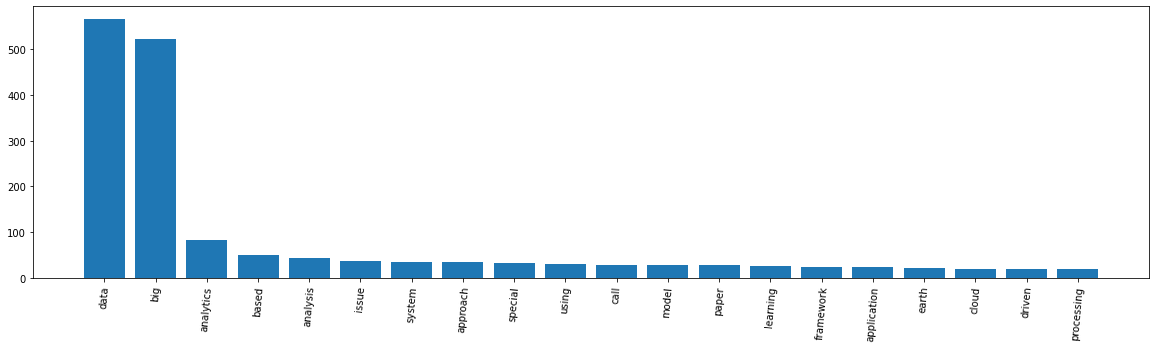

In [52]:
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.figure(figsize=(20,5))
plt.bar(range(len(word_count)),sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')
plt.show()

#### 결과 시각화

In [53]:
all_data_concat['doc_count'] = 0
summary_year = all_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,2004,1
1,2011,1
2,2012,7
3,2013,12
4,2014,50
5,2015,44
6,2016,68
7,2017,73
8,2018,67
9,2019,41


In [66]:
summary_year['출판일']

0     2004
1     2011
2     2012
3     2013
4     2014
5     2015
6     2016
7     2017
8     2018
9     2019
10    2020
11    2021
12    2022
Name: 출판일, dtype: int64

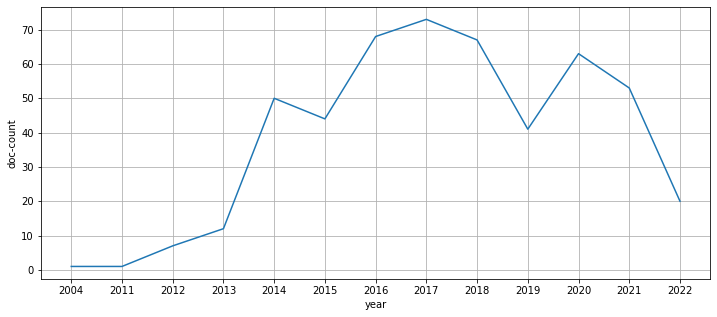

In [63]:
plt.figure(figsize=(12,5))
plt.xlabel('year')
plt.ylabel('doc-count')
plt.grid(True)
plt.plot(range(len(summary_year)),summary_year['doc_count'])
# summary_year['출판일'] 에서 year을 하나씩 뽑아서 len(summary_year)만큼 하나씩 출력한다.
plt.xticks(range(len(summary_year)), [year for year in summary_year['출판일']])
plt.show()

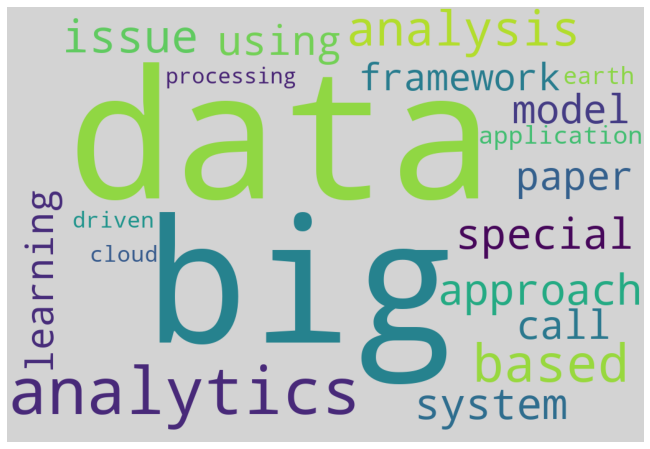

In [60]:
stopwords  = set(STOPWORDS)
wc = WordCloud(background_color='lightgray',stopwords=stopwords, width=1024, height=700)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(15,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [61]:
cloud.to_file('./data/riss_bigdata_wordcloud.png')